<a href="https://colab.research.google.com/github/parthusun8/pothole_detection/blob/main/pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BASIC IMPORTS AND DRIVE MOUNT

In [ ]:
import tensorflow as tf
from google.colab import files
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os

In [ ]:
if not os.path.exists('/content/data'):
  !git clone 'https://github.com/parthusun8/pothole_detection' 'data'
  !rm -rf '/content/data/assets'
  !rm '/content/data/README.md'
else:
  print('DATASET ALREADY EXISTS')

Cloning into 'data'...
remote: Enumerating objects: 713, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 713 (delta 8), reused 21 (delta 7), pack-reused 687
Receiving objects: 100% (713/713), 192.86 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (8/8), done.


## MODEL FITTING

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory(
    directory="/content/data/train",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
    subset="training")

validation_set = train_datagen.flow_from_directory(
    directory="/content/data/train",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
    subset="validation"
)

Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
print("TRAIN DATA SIZE -- 520 IMAGES IN TOTAL FROM NORMAL AND POTHOLE MIX")
print("VALIDATION DATA SIZE -- 130 IMAGES IN TOTAL FROM NORMAL AND POTHOLE MIX")

TRAIN DATA SIZE -- 520 IMAGES IN TOTAL FROM NORMAL AND POTHOLE MIX
VALIDATION DATA SIZE -- 130 IMAGES IN TOTAL FROM NORMAL AND POTHOLE MIX


CREATING THE CNN LAYERS

In [ ]:
cnn = None

In [ ]:
if not os.path.exists('/content/data/model.h5'):
  cnn = tf.keras.models.Sequential()
  cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

  cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

  cnn.add(tf.keras.layers.Flatten())

  cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

  cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  
else:
  cnn = tf.keras.models.load_model('model.h5')

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

MODEL FITTING

In [ ]:
history = None
if not os.path.exists('/content/data/history.npy'):
  history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)
  cnn.save("model.h5")
  np.save('history.npy',history.history)
  files.download('history.npy')
  files.download('model.h5')
else:
  history = np.load('history.npy',allow_pickle='TRUE').item()

Epoch 1/25
17/17 [==============================] - 24s 1s/step - loss: 0.1129 - accuracy: 0.9558 - val_loss: 0.4148 - val_accuracy: 0.8385
Epoch 2/25
17/17 [==============================] - 23s 1s/step - loss: 0.1420 - accuracy: 0.9423 - val_loss: 0.3805 - val_accuracy: 0.8385
Epoch 3/25
17/17 [==============================] - 22s 1s/step - loss: 0.1339 - accuracy: 0.9442 - val_loss: 0.4110 - val_accuracy: 0.8385
Epoch 4/25
17/17 [==============================] - 19s 1s/step - loss: 0.1130 - accuracy: 0.9615 - val_loss: 0.4717 - val_accuracy: 0.8538
Epoch 5/25
17/17 [==============================] - 21s 1s/step - loss: 0.0828 - accuracy: 0.9712 - val_loss: 0.4358 - val_accuracy: 0.8538
Epoch 6/25
17/17 [==============================] - 21s 1s/step - loss: 0.0796 - accuracy: 0.9692 - val_loss: 0.3404 - val_accuracy: 0.8692
Epoch 7/25
17/17 [==============================] - 22s 1s/step - loss: 0.0833 - accuracy: 0.9577 - val_loss: 0.6694 - val_accuracy: 0.8154
Epoch 8/25
17/17 [==

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## MODEL HISTORY PLOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

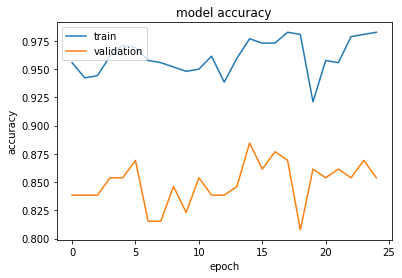

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

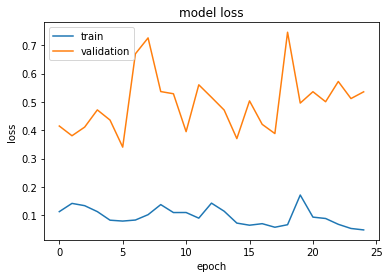

In [ ]:
## MODEL ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('model_accuracy.jpg')
files.download('model_accuracy.jpg')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('model_loss.jpg')
files.download('model_loss.jpg')
plt.show()

## MODEL ARCHITECHTURE

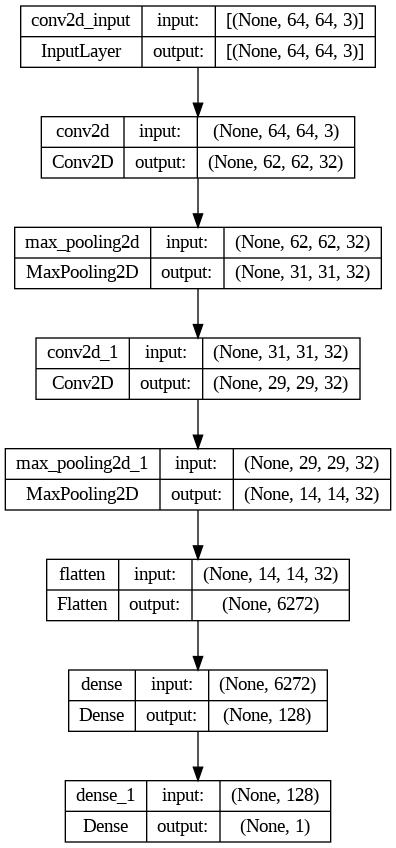

In [ ]:
from keras.utils import plot_model
plot_model(cnn, to_file='model_arch.jpg', show_shapes=True)

In [ ]:
files.download('model_arch.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## MODEL EVALUATION, CONFUSION MATRIX, F1-SCORE

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    "/content/data/test",
     target_size=(64, 64),
    batch_size=32,
    shuffle=False)

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = cnn.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


Found 31 images belonging to 2 classes.
1/1 [==============================] - 1s 587ms/step


In [ ]:
print(predictions)
print(predicted_classes)

[[0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.02182254]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# print(predictions)
preds = []

for pred in predictions:
  preds.append(pred[0])

print(preds)

[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


GROUND TRUTH

In [ ]:
true_classes = test_data_generator.classes #GROUND TRUTH
class_labels = list(test_data_generator.class_indices.keys())
print(true_classes)
print(class_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['normal', 'potholes']


CONFUSION MATRIX

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

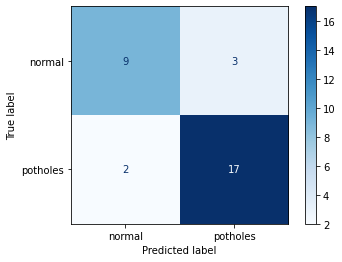

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_data_generator.classes, preds)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.savefig('confusion_matrix.jpg')
files.download("confusion_matrix.jpg") 
plt.show()

F1 SCORE

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_data_generator.classes, preds))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.85      0.89      0.87        19

    accuracy                           0.84        31
   macro avg       0.83      0.82      0.83        31
weighted avg       0.84      0.84      0.84        31



## CREATING TEST DATASET FOR DATA VISUALIZATION

In [ ]:
import numpy as np
import keras.utils as image
import cv2
test_dataset = []
for dirname, _, filenames in os.walk('/content/data/test'):
  for filename in filenames:
    imgFile = os.path.join(dirname, filename)
    img = cv2.imread(imgFile)
    img1 = image.load_img(imgFile, target_size = (64, 64))
    img1 = image.img_to_array(img1)
    img1 = np.expand_dims(img1, axis = 0)

    label = dirname.split('/')[4]
    
    result = cnn.predict(img1)
    prob = np.max(result, axis=1)
    pred_per = prob * 100
    prediction = 'potholes' if result[0][0] == 1 else 'normal'

    test_dataset.append((img1, img, label, prediction, pred_per))

1/1 [==============================] - 0s 22ms/step


In [ ]:
total_test_dataset_size = len(test_dataset)
print(total_test_dataset_size)

31


PLOT TEST DATASET WITH ACTUAL LABEL AND PREDICTED LABEL ALONG WITH PREDICTION PERCENTAGE

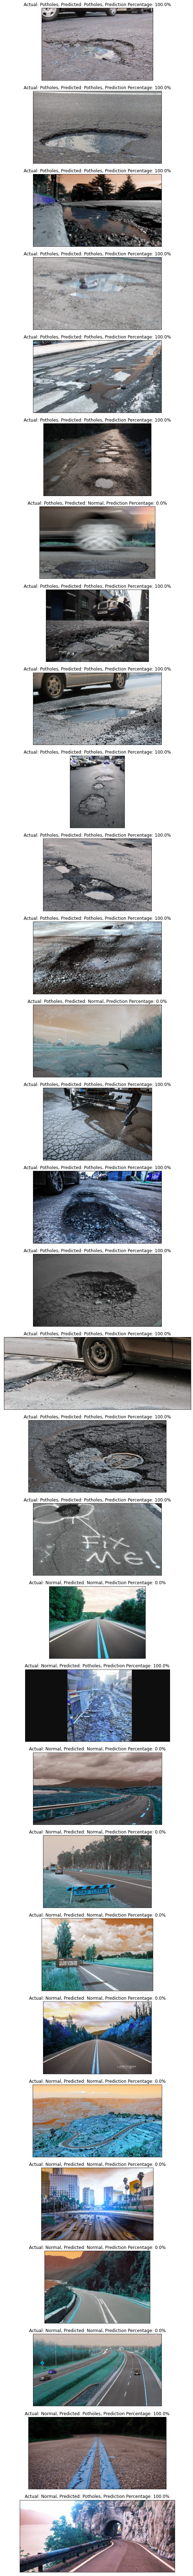

In [ ]:
fig, axs = plt.subplots(nrows=total_test_dataset_size, ncols=1, figsize = (100, 100))
i = 0
for _, img, true_label, pred_label, prob in test_dataset:
  title = f'Actual: {true_label.capitalize()}, Predicted: {pred_label.capitalize()}, Prediction Percentage: {prob[0]}%'
  axs[i].imshow(img)
  axs[i].set_title(title)

  axs[i].set_xticks([])
  axs[i].set_yticks([])

  i+=1

plt.tight_layout()
plt.show()

## FEATURE MAPS

In [ ]:
layer_names = [layer.name for layer in cnn.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'flatten',
 'dense',
 'dense_1']

In [ ]:
layer_outputs = [layer.output for layer in cnn.layers]
layer_outputs

[<KerasTensor: shape=(None, 62, 62, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 31, 31, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 29, 29, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 6272) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]

In [ ]:
feature_map_model = tf.keras.models.Model(cnn.input, layer_outputs)
image_path= "/content/data/test/potholes/319.jpg"

img = image.load_img(image_path, target_size = (64, 64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

feature_maps = feature_map_model.predict(img)

1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 47ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

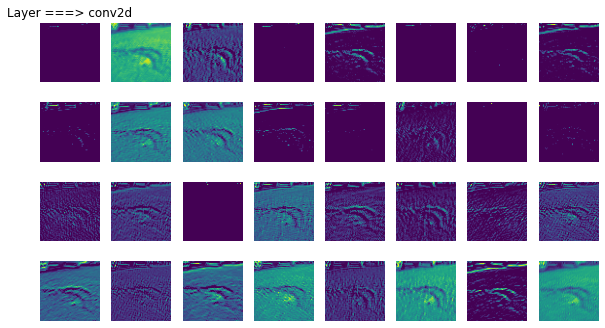

1/1 [==============================] - 0s 77ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

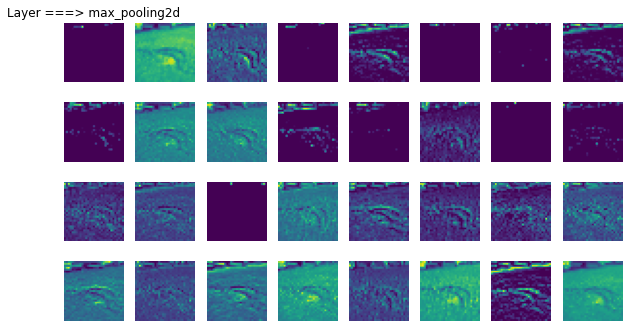

1/1 [==============================] - 0s 67ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

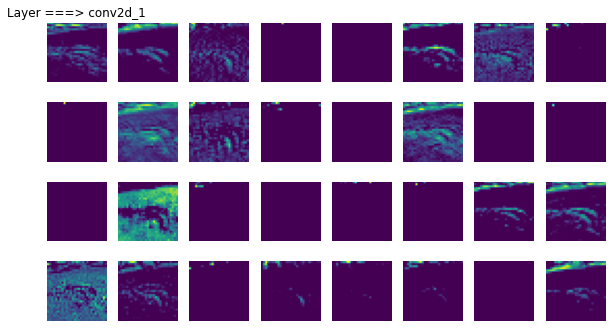

1/1 [==============================] - 0s 51ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

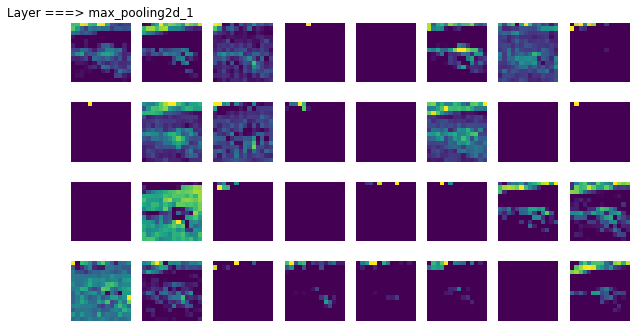

In [ ]:
from keras.models import Model
input_image = test_dataset[0][0] #CAN CHANGE INPUT IMAGE FOR DIFFERENT FEATURE MAPS

for layer_name, feature_map in zip(layer_names, feature_maps):
  # print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")
  if len(feature_map.shape) == 4 and feature_map.shape[3] == 32:
    intermediate_layer_model = Model(cnn.input, cnn.get_layer(layer_name).output)
    activations = intermediate_layer_model.predict(input_image)

    # Plot the feature maps for the input image
    title = f'Layer ===> {layer_name}'
    plt.figure(figsize=(10,10))
    
    # plt.title(title)
    for i in range(activations.shape[-1]):
      if(i==1):
        plt.title(title)
      plt.subplot(7, 8, i+1)
      plt.imshow(activations[0,:,:,i], cmap='viridis')
      plt.axis('off')
    plt.savefig(f'{layer_name}.jpg')
    files.download(f'{layer_name}.jpg')
    plt.show()